In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import f_oneway, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
dataset= pd.read_csv("cereal.csv")
dataset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [3]:
dataset[dataset['type'] == 'H'].head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
#Null Values
dataset.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [6]:
dataset.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [7]:
#General Exploration¶
#What is the distribution of cereal ratings?

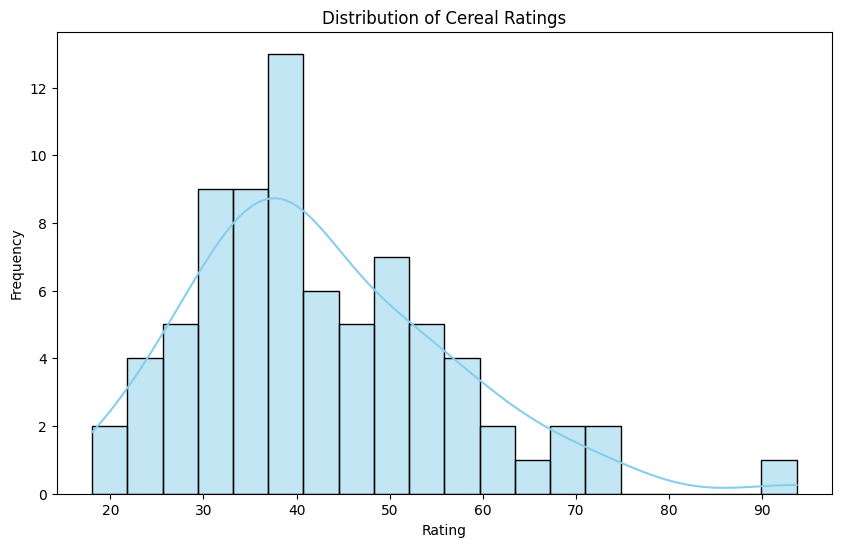

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(dataset['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Cereal Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [10]:
#How many cereals are there from each manufacturer

In [12]:
def get_count(series, limit=None):
    
    if limit == None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [13]:
def plot(x, y, x_label=None, y_label=None, title=None,figsize=(7,5), type='bar'):
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x=x,y=y, ax=ax)
    elif type == 'line':
        sns.lineplot(x=x,y=x, ax = ax, sort=False)
    
    plt.show()

In [15]:
x,y = get_count(dataset['mfr'])
x,y

(array(['K', 'G', 'P', 'Q', 'R', 'N', 'A'], dtype=object),
 array([29.87012987, 28.57142857, 11.68831169, 10.38961039, 10.38961039,
         7.79220779,  1.2987013 ]))

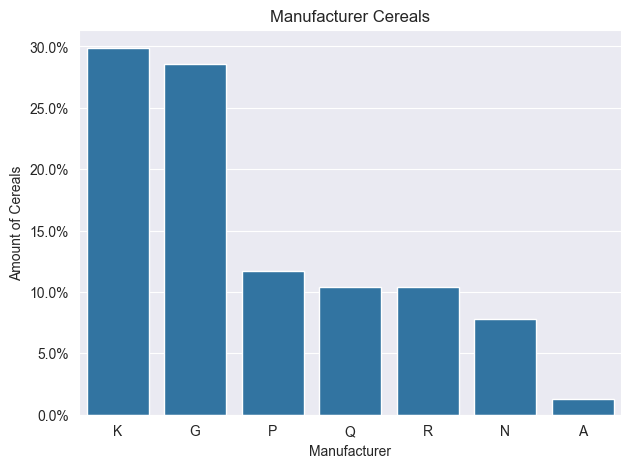

In [16]:
plot(x=x, y=y, x_label='Manufacturer', y_label='Amount of Cereals', title='Manufacturer Cereals')

In [18]:
nutr_cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']
nutr_stats = dataset[nutr_cols]

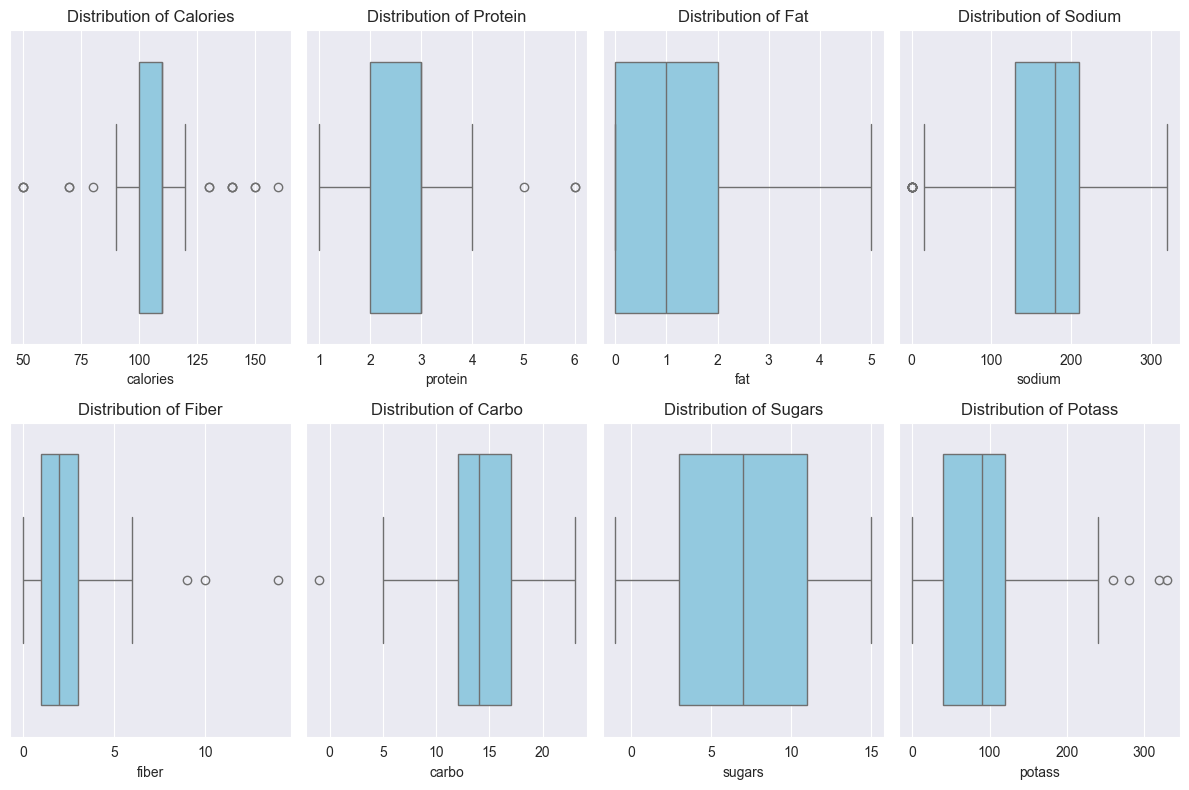

In [19]:
plt.figure(figsize=(12,8))

for i, col in enumerate(nutr_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=dataset[col],color='skyblue')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col)
              
plt.tight_layout()
plt.show()

In [22]:
#Type of Cereal¶
#How do the nutritional values differ between cold and hot cereals?

In [25]:
cold = dataset[dataset['type'] == 'C']
hot = dataset[dataset['type'] == 'H']

cold_stats = cold[nutr_cols].describe()
hot_stats = hot[nutr_cols].describe()

print("Descriptive Stats for Cold Cereals")
cold_stats

Descriptive Stats for Cold Cereals


,calories,protein,fat,sodium,fiber,carbo,sugars,potass
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,107.162162,2.486486,1.013514,165.067568,2.189189,14.702703,7.175676,97.216216
std,19.829428,1.062992,1.013515,80.633167,2.413862,3.889676,4.333236,71.816217
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,-1.000000
25%,100.000000,2.000000,0.000000,136.250000,1.000000,12.000000,3.000000,40.000000
50%,110.000000,2.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000
75%,110.000000,3.000000,1.750000,217.500000,3.000000,17.000000,11.000000,120.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000


In [26]:
print("Descriptive Stats for Hot Cereals")
hot_stats

Descriptive Stats for Hot Cereals


,calories,protein,fat,sodium,fiber,carbo,sugars,potass
count,3.0,3.0,3.0,3.000000,3.000000,3.000000,3.000000,3.00000
mean,100.0,4.0,1.0,26.666667,1.233333,12.000000,0.666667,68.00000
std,0.0,1.0,1.0,46.188022,1.365040,11.532563,2.081666,60.22458
min,100.0,3.0,0.0,0.000000,0.000000,-1.000000,-1.000000,-1.00000
25%,100.0,3.5,0.5,0.000000,0.500000,7.500000,-0.500000,47.00000
50%,100.0,4.0,1.0,0.000000,1.000000,16.000000,0.000000,95.00000
75%,100.0,4.5,1.5,40.000000,1.850000,18.500000,1.500000,102.50000
max,100.0,5.0,2.0,80.000000,2.700000,21.000000,3.000000,110.00000


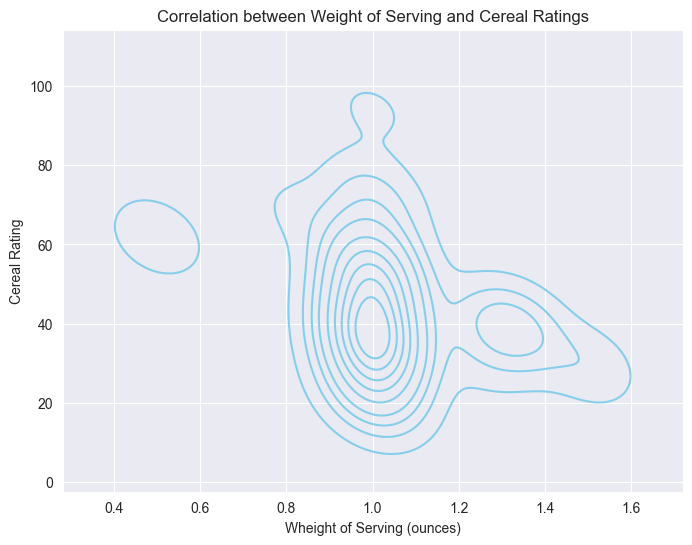

In [32]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='weight', y='rating', data=dataset, color='skyblue')
plt.title('Correlation between Weight of Serving and Cereal Ratings')
plt.xlabel('Wheight of Serving (ounces)')
plt.ylabel('Cereal Rating')
plt.show()

C:\Users\sreet\AppData\Local\Temp\ipykernel_7480\1338068993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='shelf',y=col, data=dataset, palette='viridis')
C:\Users\sreet\AppData\Local\Temp\ipykernel_7480\1338068993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='shelf',y=col, data=dataset, palette='viridis')
C:\Users\sreet\AppData\Local\Temp\ipykernel_7480\1338068993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='shelf',y=col, data=dataset, palette='viridis')
C:\Users\sreet\AppData\Local\Temp\ipykernel_7480\1338068993.p

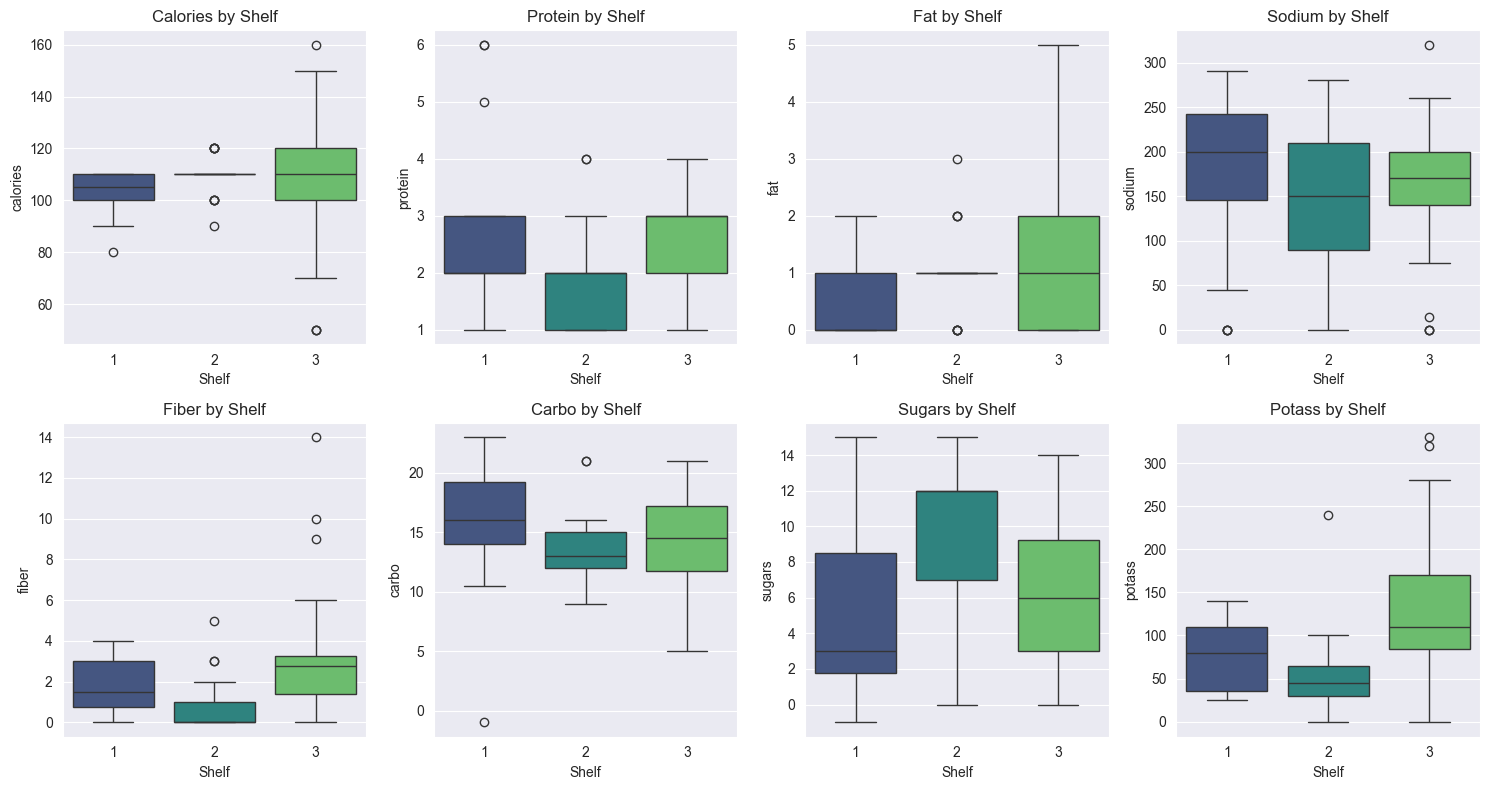

In [33]:
plt.figure(figsize=(15,8))
for i, col in enumerate(nutr_cols, 1):
    plt.subplot(2,4,i)
    sns.boxplot(x='shelf',y=col, data=dataset, palette='viridis')
    plt.title(f'{col.capitalize()} by Shelf')
    plt.xlabel('Shelf')
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()

C:\Users\sreet\AppData\Local\Temp\ipykernel_7480\797761922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data= dataset, palette='pastel')
C:\Users\sreet\AppData\Local\Temp\ipykernel_7480\797761922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data= dataset, palette='pastel')
C:\Users\sreet\AppData\Local\Temp\ipykernel_7480\797761922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data= dataset, palette='pastel')
C:\Users\sreet\AppData\Local\Temp\ipykernel_7480\797761922.py:4:

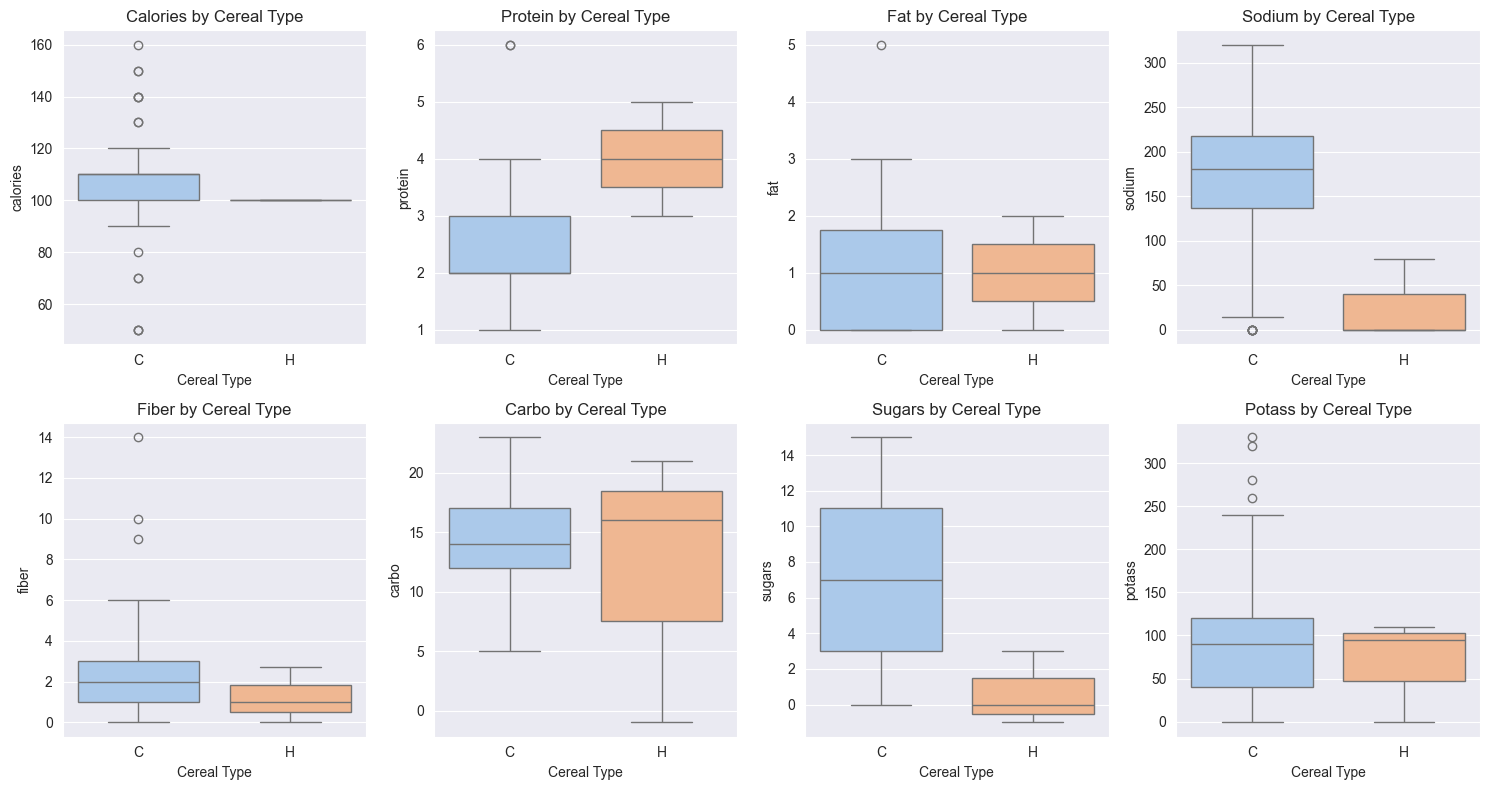

In [35]:
plt.figure(figsize=(15,8))
for i, col in enumerate(nutr_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='type', y=col, data= dataset, palette='pastel')
    plt.title(f'{col.capitalize()} by Cereal Type')
    plt.xlabel('Cereal Type')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

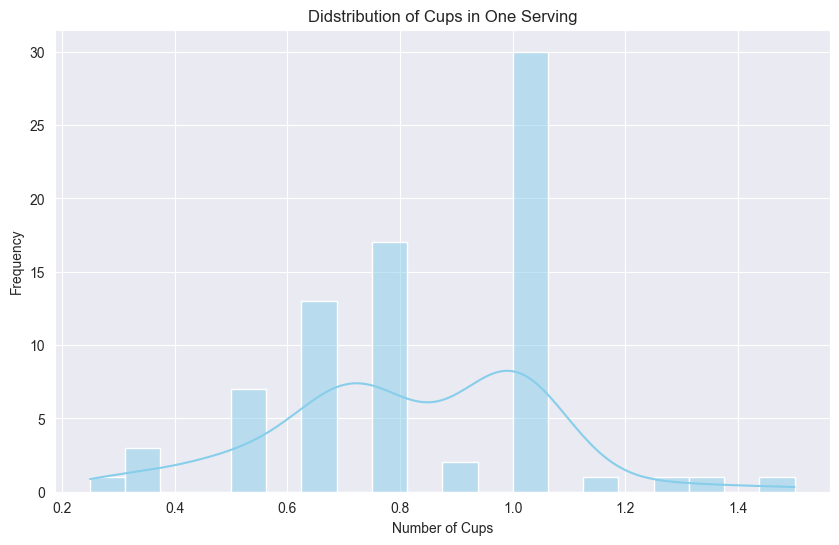

In [38]:
#How many cups are typically in one serving, and does it relate to the cereal's nutritional content or rating?
cups_stats = dataset['cups'].describe()

plt.figure(figsize=(10,6))
sns.histplot(dataset['cups'], bins=20, kde=True, color = 'skyblue')
plt.title('Didstribution of Cups in One Serving')
plt.xlabel('Number of Cups')
plt.ylabel('Frequency')
plt.show()

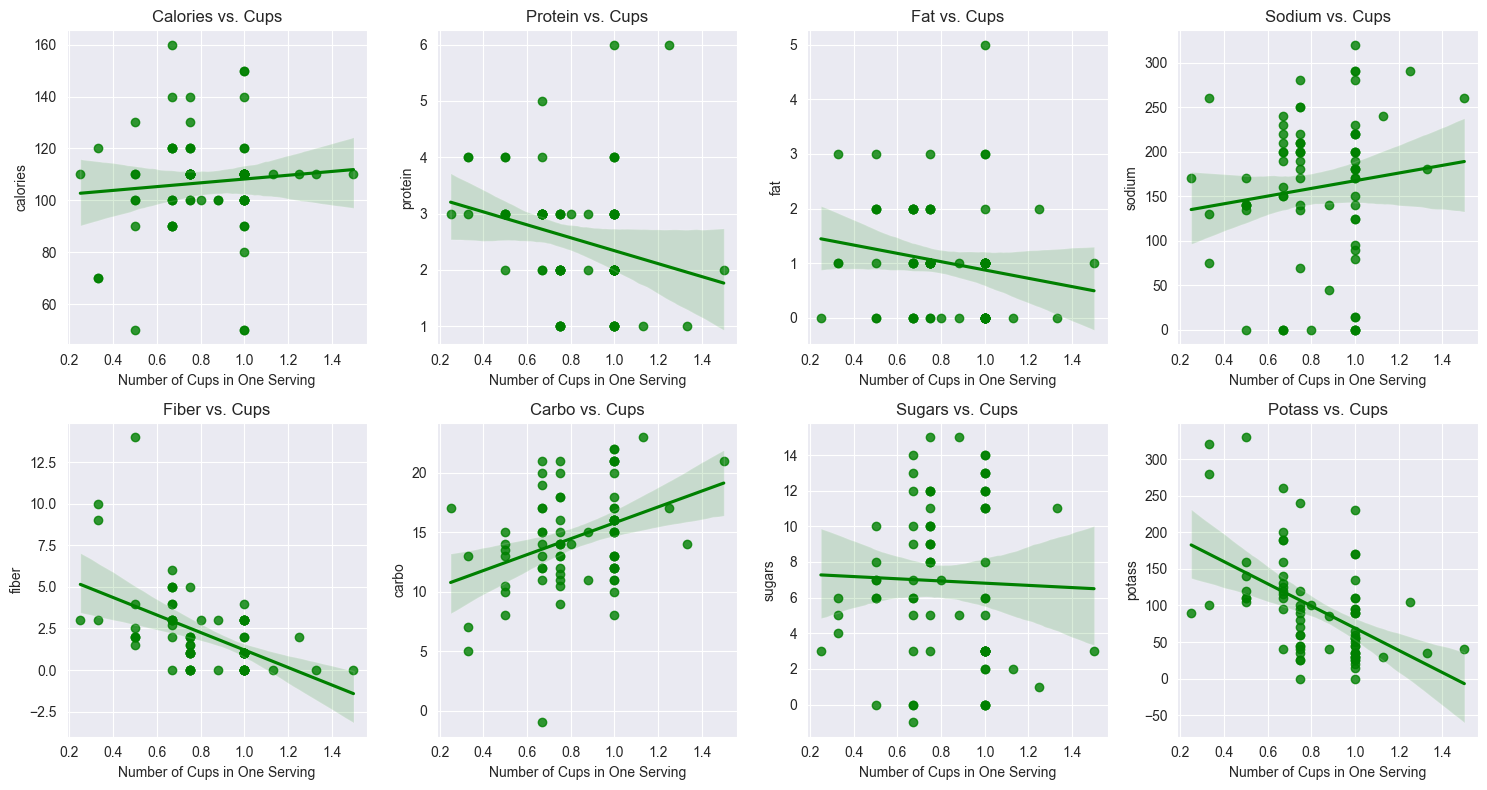

In [39]:
plt.figure(figsize=(15,8))

for i, col in enumerate(nutr_cols, 1):
    plt.subplot(2,4,i)
    sns.regplot(x='cups', y=col, data=dataset, color='Green')
    plt.title(f'{col.capitalize()} vs. Cups')
    plt.xlabel('Number of Cups in One Serving')
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()

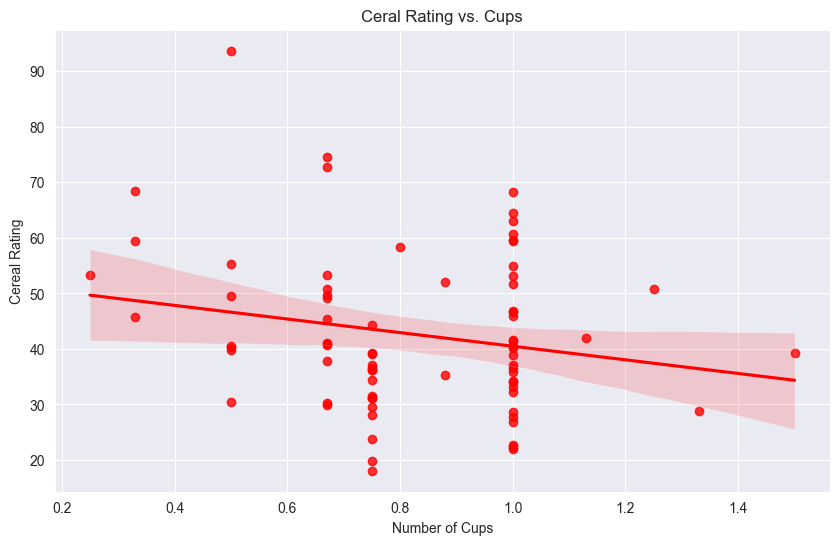

In [40]:
plt.figure(figsize=(10, 6))
sns.regplot(x='cups', y='rating', data=dataset, color='Red')
plt.title('Ceral Rating vs. Cups')
plt.xlabel('Number of Cups')
plt.ylabel('Cereal Rating')
plt.show()

In [41]:
#Correlation Analysis
#strong correlations between different nutritional components

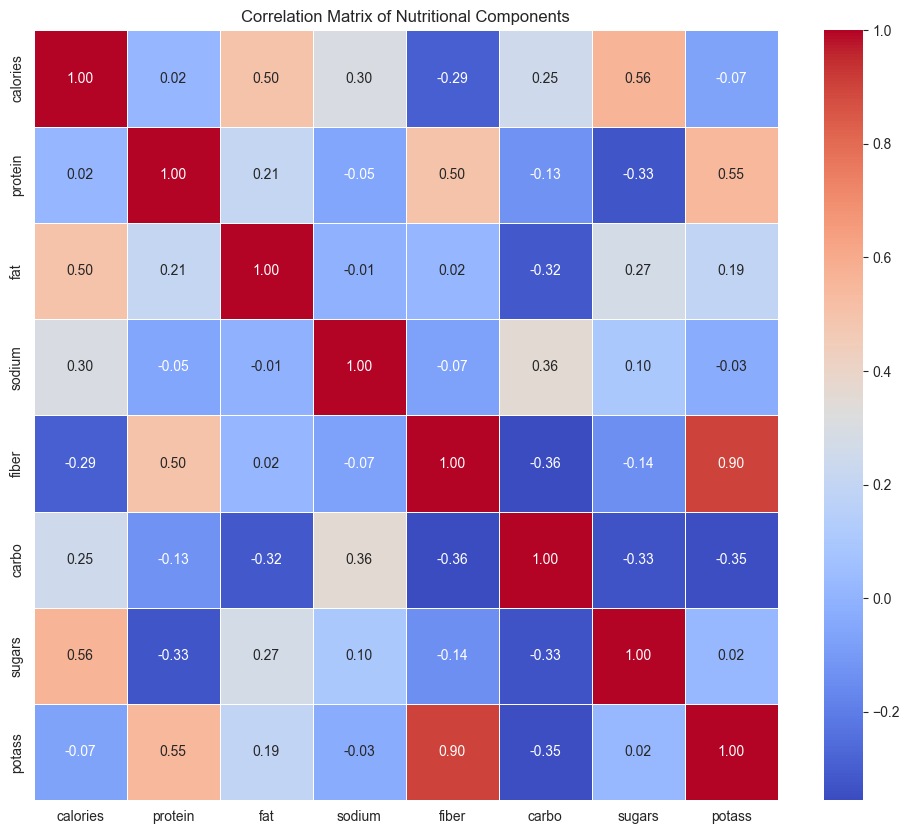

In [42]:
corr_matrix = dataset[nutr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f',linewidths=.5)
plt.title('Correlation Matrix of Nutritional Components')
plt.show()

In [43]:
#Does the presence of certain vitamins correlate with higher ratings?

C:\Users\sreet\AppData\Local\Temp\ipykernel_7480\3808855113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vitamins', y='rating', data=vit_rating, palette='pastel')


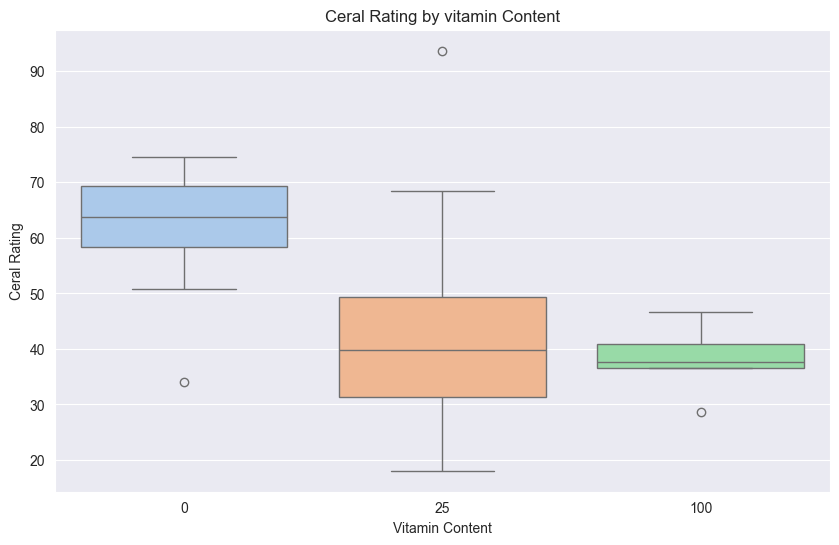

In [44]:
vit_rating = dataset[['vitamins'] + ['rating']]
plt.figure(figsize=(10,6))
sns.boxplot(x='vitamins', y='rating', data=vit_rating, palette='pastel')
plt.title('Ceral Rating by vitamin Content')
plt.xlabel('Vitamin Content')
plt.ylabel('Ceral Rating')
plt.show()

Text(0, 0.5, 'Cereal Rating')

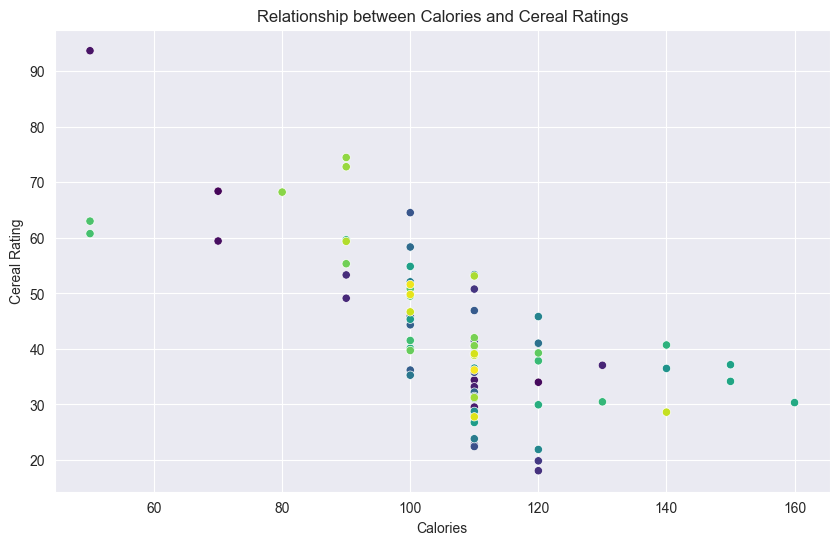

In [45]:
#Top Cereals
nutritional_component = 'calories'


plt.figure(figsize=(10, 6))
sns.scatterplot(x=nutritional_component, y='rating', data=dataset, hue='name', palette='viridis', legend=False)
plt.title(f'Relationship between {nutritional_component.capitalize()} and Cereal Ratings')
plt.xlabel(f'{nutritional_component.capitalize()}')
plt.ylabel('Cereal Rating')

In [46]:
#Rating Prediction
X = dataset[nutr_cols]
y = dataset['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.9101291857071152


In [48]:
new_data = pd.DataFrame({
    'calories': [110, 90, 120],
    'protein': [2, 3, 4],
    'fat': [1, 0, 2],
    'sodium': [200, 180, 220],
    'fiber': [5, 3, 6],
    'carbo': [20, 15, 25],
    'sugars': [7, 5, 8],
    'potass': [320, 250, 380]
})

new_predictions = model.predict(new_data)


predicted_ratings_dataset = pd.DataFrame({'Predicted Rating': new_predictions})
result_dataset = pd.concat([new_data, predicted_ratings_dataset], axis=1)
print("Test Data with Predicted Ratings:")
result_dataset

Test Data with Predicted Ratings:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,Predicted Rating
0,110,2,1,200,5,20,7,320,44.860066
1,90,3,0,180,3,15,5,250,47.546260
2,120,4,2,220,6,25,8,380,52.037521
